In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
import matplotlib.colors as colors
import cmocean.cm as cmo
from glob import glob
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

In [2]:
def prepro(ds):
    return ds.isel(y=slice(800, None))

In [3]:
grid_files = ["/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mask.nc", 
              "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mesh_hgr.nc",
              "/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/CREG12.L75-REF08_mesh_zgr.nc"]

In [4]:
grid = xr.open_mfdataset(grid_files, parallel=True, preprocess=prepro)

In [5]:
SSH_data_filesREF = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-REF08-SSH_clim" 
                                + "/CREG12.L75-REF08_*.5d_SSHclim.nc"))
SSH_data_filesFUT = sorted(glob("/data0/project/drakkar/USERS/jrieck/CREG12.L75-FUT08-SSH_clim" 
                                + "/CREG12.L75-FUT08_*.5d_SSHclim.nc"))

In [6]:
SSH_REF = xr.open_mfdataset(SSH_data_filesREF, parallel=True, preprocess=prepro)
SSH_FUT = xr.open_mfdataset(SSH_data_filesFUT, parallel=True, preprocess=prepro)

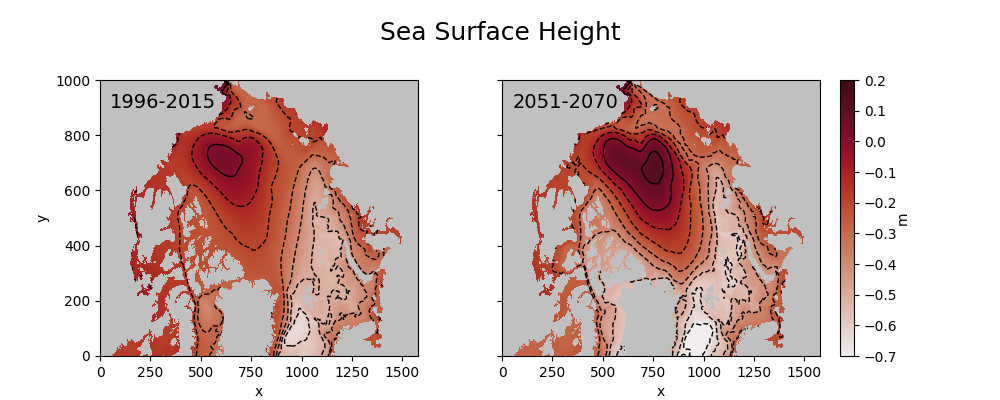

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].set_facecolor("silver")
a = ax[0].pcolormesh(SSH_REF.x, SSH_REF.y, 
                     SSH_REF.ssh.mean("time_counter").squeeze(), 
                     cmap=cmo.amp, vmin=-0.7, vmax=0.2,
                     shading="nearest", zorder=1)
plt.colorbar(a, ax=ax[0], label=r"m")
ax[0].contour(SSH_REF.x, SSH_REF.y, 
              SSH_REF.ssh.mean("time_counter").squeeze(), 
              levels=np.arange(-0.7, 0.2, 0.1), colors="k", linewidths=1, zorder=2)
ax[0].text(50, 900, "1996-2015", fontsize=14)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].set_facecolor("silver")
b = ax[1].pcolormesh(SSH_FUT.x, SSH_FUT.y, 
                     SSH_FUT.ssh.mean("time_counter").squeeze(), 
                     cmap=cmo.amp, vmin=-0.7, vmax=0.2,
                     shading="nearest", zorder=1)
cb = plt.colorbar(b, ax=ax[1])
cb.set_label(r"m", labelpad=-1)
ax[1].contour(SSH_FUT.x, SSH_FUT.y, 
              SSH_FUT.ssh.mean("time_counter").squeeze(), 
              levels=np.arange(-0.7, 0.2, 0.1), colors="k", linewidths=1, zorder=2)
ax[1].text(50, 900, "2051-2070", fontsize=14)
ax[1].set_xlabel("x")
ax[1].set_ylabel("")
ax[1].set_yticklabels([])

fig.text(0.5, 0.9, "Sea Surface Height", fontsize=18, ha="center");

plt.subplots_adjust(top=0.8, wspace=0.01, left=0.1, right=0.9)

fig.delaxes(fig.axes[2])

#plt.savefig("/home/rieck/figures/CREG12.L75_REFvsFUT_SSH.png", dpi=300)

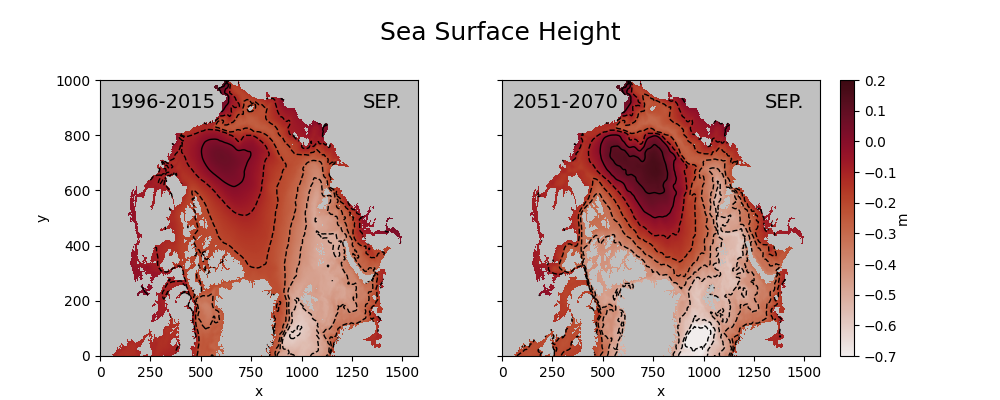

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].set_facecolor("silver")
a = ax[0].pcolormesh(SSH_REF.x, SSH_REF.y, 
                     SSH_REF.ssh.groupby("time_counter.month").mean("time_counter").isel(month=8).squeeze(), 
                     cmap=cmo.amp, vmin=-0.7, vmax=0.2,
                     shading="nearest", zorder=1)
plt.colorbar(a, ax=ax[0], label=r"m")
ax[0].contour(SSH_REF.x, SSH_REF.y, 
              SSH_REF.ssh.groupby("time_counter.month").mean("time_counter").isel(month=8).squeeze(), 
              levels=np.arange(-0.7, 0.2, 0.1), colors="k", linewidths=1, zorder=2)
ax[0].text(50, 900, "1996-2015", fontsize=14)
ax[0].text(1500, 900, "SEP.", fontsize=14, ha="right")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].set_facecolor("silver")
b = ax[1].pcolormesh(SSH_FUT.x, SSH_FUT.y, 
                     SSH_FUT.ssh.groupby("time_counter.month").mean("time_counter").isel(month=8).squeeze(), 
                     cmap=cmo.amp, vmin=-0.7, vmax=0.2,
                     shading="nearest", zorder=1)
cb = plt.colorbar(b, ax=ax[1])
cb.set_label(r"m", labelpad=-1)
ax[1].contour(SSH_FUT.x, SSH_FUT.y, 
              SSH_FUT.ssh.groupby("time_counter.month").mean("time_counter").isel(month=8).squeeze(), 
              levels=np.arange(-0.7, 0.2, 0.1), colors="k", linewidths=1, zorder=2)
ax[1].text(50, 900, "2051-2070", fontsize=14)
ax[1].text(1500, 900, "SEP.", fontsize=14, ha="right")
ax[1].set_xlabel("x")
ax[1].set_ylabel("")
ax[1].set_yticklabels([])

fig.text(0.5, 0.9, "Sea Surface Height", fontsize=18, ha="center");

plt.subplots_adjust(top=0.8, wspace=0.01, left=0.1, right=0.9)

fig.delaxes(fig.axes[2])

#plt.savefig("/home/rieck/figures/CREG12.L75_REFvsFUT_SSH_september.png", dpi=300)